In [37]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbr
import pickle as pickle
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [57]:
df = pd.read_csv("kc_house_data.csv")
df.columns
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [55]:
#sns.heatmap(df.corr())#, annot=True)

In [56]:
#x_columns  = 20
#x = df.iloc[:,0:x_columns].values 
#y = df.iloc[:,x_columns].values

In [41]:
df['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [42]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [43]:
0 in df['yr_renovated'].unique()

True

In [44]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [45]:
    #x_columns  = 20
    #x = df.iloc[:,0:x_columns].values 
    #y = df.iloc[:,x_columns].values

    #from sklearn.model_selection import train_test_split
    #x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

    #from sklearn.linear_model import LinearRegression
    #model = LinearRegression()
    #model.fit(x_train, y_train)

    #y_pred = model.predict(x_test)

    #score = model.score(x_test, y_test)

In [46]:
df.groupby(level=0).mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [47]:
#x=df["yr_built"]
#y=df["price"]
#plt.scatter(x, y, marker='o');
#plt.title("Price vs. Year Built")
#plt.xlabel('yr_built')
#plt.ylabel('price')
#plt.show()

In [48]:
df2 = df[df['yr_renovated']==0]
df2 = df2[df2['bedrooms']==0]
df2 = df2[df2['bathrooms']==0]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 875 to 19452
Data columns (total 21 columns):
id               7 non-null int64
date             7 non-null object
price            7 non-null float64
bedrooms         7 non-null int64
bathrooms        7 non-null float64
sqft_living      7 non-null int64
sqft_lot         7 non-null int64
floors           7 non-null float64
waterfront       7 non-null int64
view             7 non-null int64
condition        7 non-null int64
grade            7 non-null int64
sqft_above       7 non-null int64
sqft_basement    7 non-null int64
yr_built         7 non-null int64
yr_renovated     7 non-null int64
zipcode          7 non-null int64
lat              7 non-null float64
long             7 non-null float64
sqft_living15    7 non-null int64
sqft_lot15       7 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 1.2+ KB


In [49]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [50]:
df2 = df2[['bedrooms','bathrooms','sqft_living','grade','sqft_above','sqft_basement','price']]

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 875 to 19452
Data columns (total 7 columns):
bedrooms         7 non-null int64
bathrooms        7 non-null float64
sqft_living      7 non-null int64
grade            7 non-null int64
sqft_above       7 non-null int64
sqft_basement    7 non-null int64
price            7 non-null float64
dtypes: float64(2), int64(5)
memory usage: 448.0 bytes


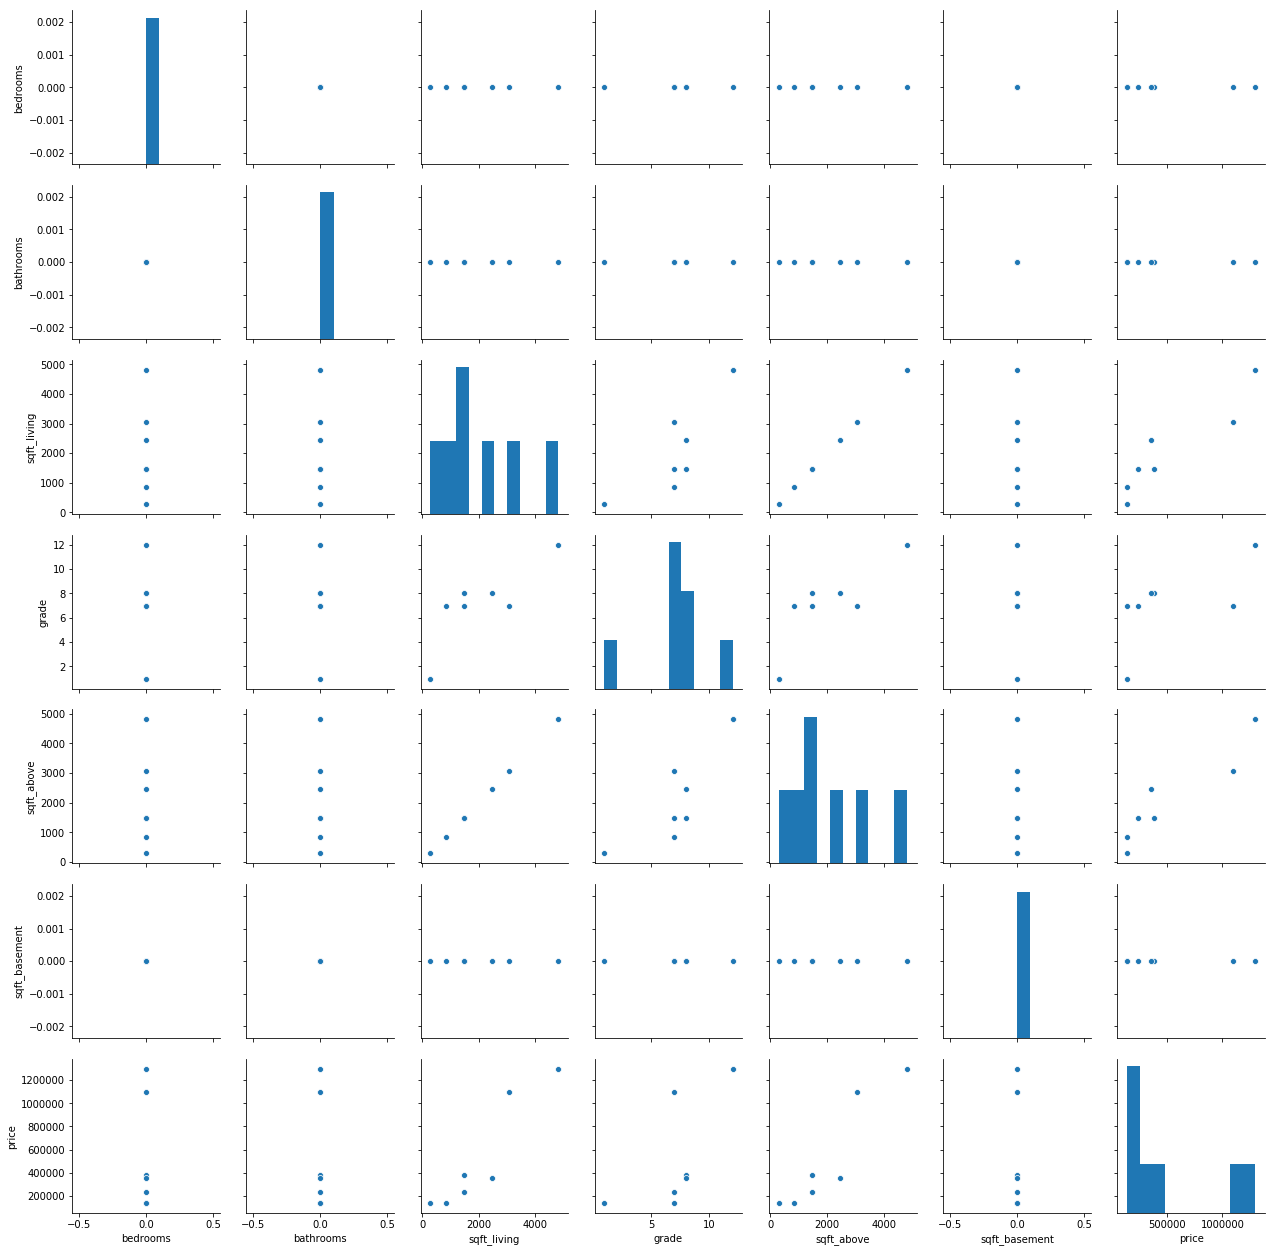

In [58]:
sns.pairplot(df2)

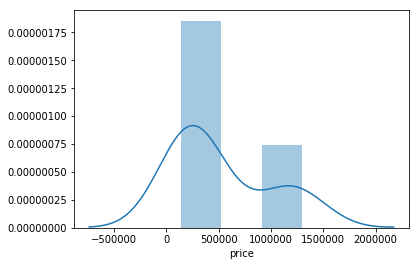

In [59]:
sns.distplot(df2['price'])

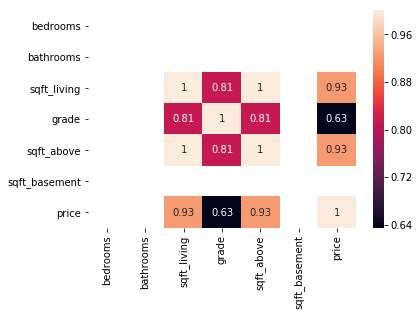

In [60]:
sns.heatmap(df2.corr(), annot=True)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x = df2[['bedrooms','bathrooms','sqft_living','grade','sqft_above','sqft_basement']]
y = df2['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [63]:
x_train.head()

,bedrooms,bathrooms,sqft_living,grade,sqft_above,sqft_basement
3119,0,0.0,1470,8,1470,0
9773,0,0.0,2460,8,2460,0
875,0,0.0,3064,7,3064,0
14423,0,0.0,844,7,844,0
9854,0,0.0,1470,7,1470,0


In [65]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
# print the intercept
print(lm.intercept_)

1126599.1498791885


In [67]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-2.557783e-08
bathrooms,0.000000e+00
sqft_living,1.882611e+02
grade,-1.873707e+05
sqft_above,1.882611e+02
sqft_basement,0.000000e+00


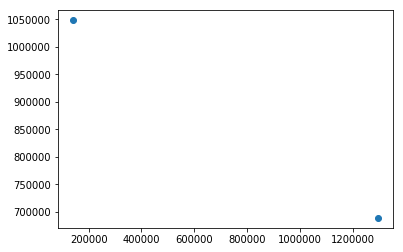

In [68]:
predictions = lm.predict(x_test)
plt.scatter(y_test,predictions)

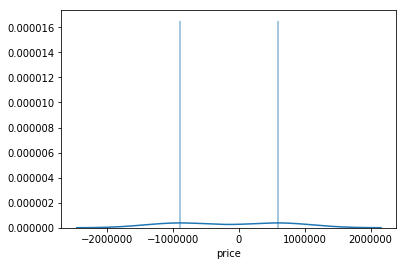

In [69]:
sns.distplot((y_test-predictions),bins=50);

In [70]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 756423.4528137757
MSE: 594675382770.0441
RMSE: 771151.9842223348
